## Saving a Cats v Dogs Model

This is a minimal example showing how to train a fastai model on Kaggle, and save it so you can use it in your app.

In [2]:
# Make sure we've got the latest version of fastai:
!pip install -Uqq fastai

First, import all the stuff we need from fastai:

In [3]:
from fastai.vision.all import *

Download and decompress our dataset, which is pictures of dogs and cats:

In [ ]:
path = untar_data(URLs.PETS)/'images'

We need a way to label our images as dogs or cats. In this dataset, pictures of cats are given a filename that starts with a capital letter:

In [ ]:
def is_cat(x): return x[0].isupper()

Now we can create our `DataLoaders`:

In [ ]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

... and train our model, a resnet18 (to keep it small and fast):

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Now we can export our trained `Learner`. This contains all the information needed to run the model:

In [ ]:
learn.export('model.pkl')

Finally, open the Kaggle sidebar on the right if it's not already, and find the section marked "Output". Open the `/kaggle/working` folder, and you'll see `model.pkl`. Click on it, then click on the menu on the right that appears, and choose "Download". After a few seconds, your model will be downloaded to your computer, where you can then create your app that uses the model.

##Creating a custom model for pasta vs pizza

In [1]:
!pip install -Uqq duckduckgo_search fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
from duckduckgo_search import ddg_images
# from fastcore.all import *
from fastbook import *
from fastai.vision.widgets import *

def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


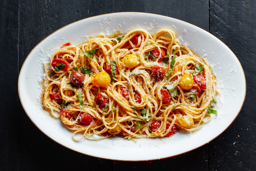

In [6]:
from fastdownload import download_url

download_url(search_images('pasta photos', max_images=1)[0], 'pasta.jpg', show_progress=False)
Image.open('pasta.jpg').to_thumb(256,256)

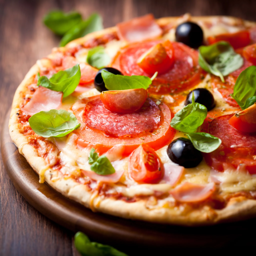

In [7]:
download_url(search_images('pizza photos', max_images=1)[0], 'pizza.jpg', show_progress=False)
Image.open('pizza.jpg').to_thumb(256,256)

In [49]:
searches = 'pizza','pasta'
path = Path('pizza_or_pasta')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(1)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(1)
    download_images(dest, urls=search_images(f'{o} illustration'))
    sleep(1)
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [50]:
fns = get_image_files(path)
fns

(#479) [Path('pizza_or_pasta/pizza/60c3f741-6154-46f4-9da8-24897c8492a5.jpg'),Path('pizza_or_pasta/pizza/6bebe945-5a86-40d6-bf71-2e1d4accdc80.jpg'),Path('pizza_or_pasta/pizza/79ae7e2b-4510-4668-9834-bdab44683a67.jpg'),Path('pizza_or_pasta/pizza/07a5dd4d-d77c-44db-aa63-705e4ac4473e.jpg'),Path('pizza_or_pasta/pizza/0d92c15d-95f6-4f97-8525-6d8976564248.jpg'),Path('pizza_or_pasta/pizza/a61d9cbb-2e81-4b21-b480-a6998a5d8ec9.jpg'),Path('pizza_or_pasta/pizza/9c88388c-f062-4633-bd33-3ebd6bf1dfd0.png'),Path('pizza_or_pasta/pizza/7f2abecb-0738-4a39-be42-ccb9a06babf9.jpg'),Path('pizza_or_pasta/pizza/6195d77c-901a-4c21-b710-0e8e2a5e50a6.jpg'),Path('pizza_or_pasta/pizza/285e3194-f8e7-4c14-9dd5-4fe2d40a1f76.png')...]

In [51]:
failed = verify_images(fns)
failed

(#15) [Path('pizza_or_pasta/pizza/b943304c-b337-4175-bde5-1eda3e3017c9.jpg'),Path('pizza_or_pasta/pizza/d1bacda8-e3e0-48a2-a9cd-5b19b6331fa3.jpg'),Path('pizza_or_pasta/pizza/e86f9233-c8ee-4fa1-aaf1-f945c23128ac.jpg'),Path('pizza_or_pasta/pizza/b6f37a00-9e6d-401d-b961-be00031b1c4b.jpg'),Path('pizza_or_pasta/pizza/0c677820-a81f-40e4-9ed6-eb711a40bf20.jpg'),Path('pizza_or_pasta/pizza/75f7cc8d-f796-4afb-84fb-8fffae7e589d.jpg'),Path('pizza_or_pasta/pizza/6a5f5710-9d60-485b-a53f-514eb21c6fcc.jpg'),Path('pizza_or_pasta/pizza/2bd7c602-45cd-4800-9a4a-a71b05c1aba7.jpg'),Path('pizza_or_pasta/pasta/2481dd58-edba-4971-8210-e5b68eb2a5f2.jpg'),Path('pizza_or_pasta/pasta/8498029d-5ab2-40ba-9907-58b5b37dbc0c.jpg')...]

In [52]:
failed.map(Path.unlink);

In [60]:
food = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [61]:
dls = food.dataloaders(path)

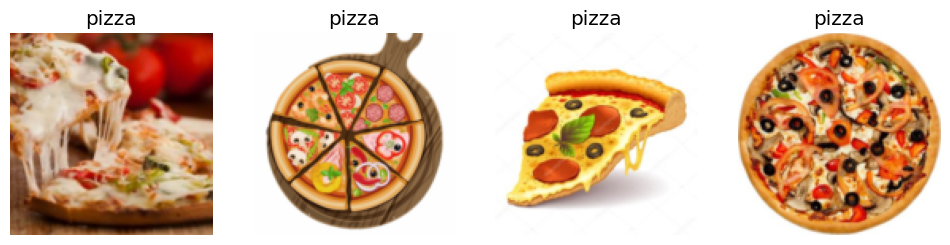

In [62]:
dls.valid.show_batch(max_n=4, nrows=1)

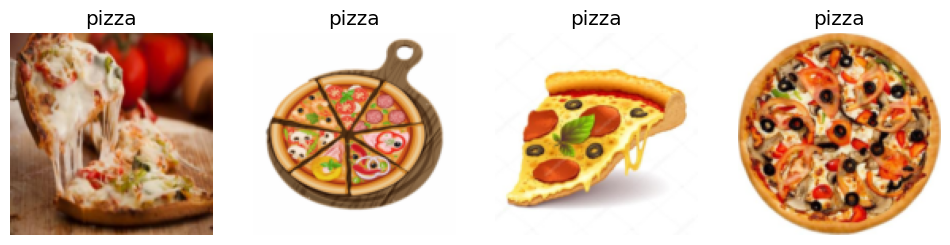

In [63]:
food = food.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = food.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

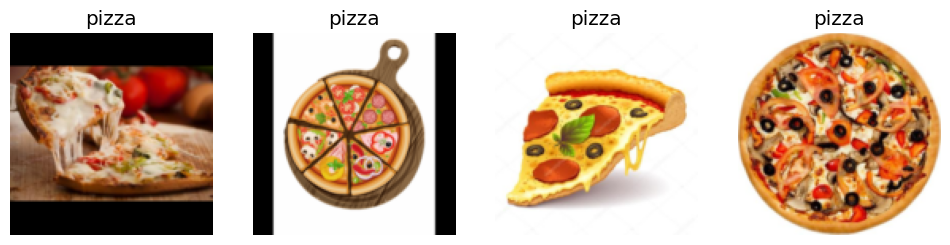

In [64]:
food = food.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = food.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

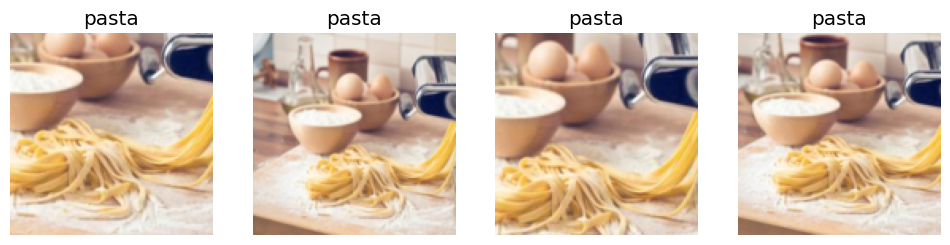

In [65]:
food = food.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = food.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

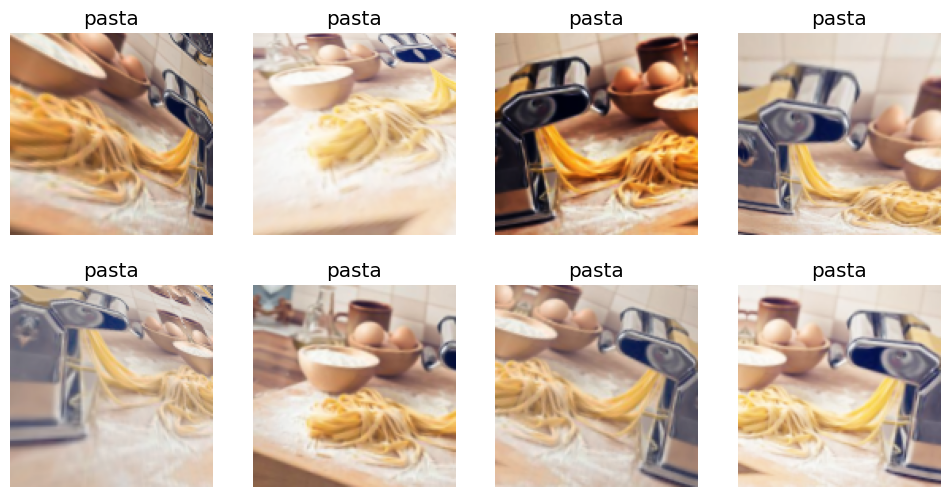

In [66]:
food = food.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = food.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [67]:
food = food.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = food.dataloaders(path)

In [68]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


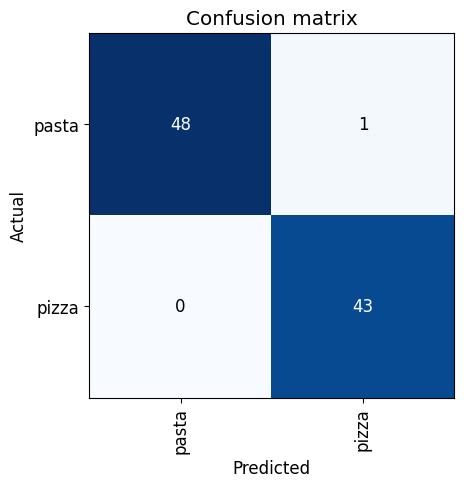

In [69]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

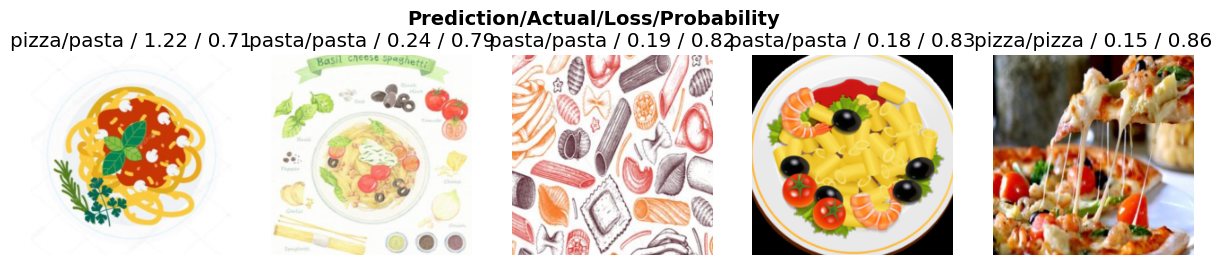

In [70]:
interp.plot_top_losses(5, nrows=1)

In [71]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [47]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [72]:
learn.export('model.pkl')

#Deployment

In [ ]:
!pip install gradio -Uqq

In [75]:
#|export
from fastai.vision.all import *
import gradio as gr

# def is_cat(x): return x[0].isupper()

In [76]:
!wget https://ichef.bbci.co.uk/news/976/cpsprodpb/16620/production/_91408619_55df76d5-2245-41c1-8031-07a4da3f313f.jpg -O dunno.jpg

--2023-08-28 07:14:09--  https://ichef.bbci.co.uk/news/976/cpsprodpb/16620/production/_91408619_55df76d5-2245-41c1-8031-07a4da3f313f.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 23.60.78.112, 2600:1407:3c00:a86::f33, 2600:1407:3c00:a81::f33, ...
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|23.60.78.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55822 (55K) [image/jpeg]
Saving to: ‘dunno.jpg’

dunno.jpg           100%[===================>]  54.51K  --.-KB/s    in 0.01s   

2023-08-28 07:14:10 (3.72 MB/s) - ‘dunno.jpg’ saved [55822/55822]



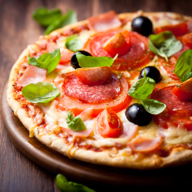

In [77]:
im = PILImage.create('pizza.jpg')
im.thumbnail((192,192))
im

In [78]:
#|export
learn = load_learner('model.pkl')

In [79]:
learn.predict(im)

('pizza', tensor(1), tensor([9.6846e-06, 9.9999e-01]))

In [82]:
#|export
categories = {'Pizza', 'Pasta'}

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [83]:
classify_image(im)

{'Pasta': 9.684600627224427e-06, 'Pizza': 0.9999903440475464}

In [85]:
image = gr.Image(shape=(192,192))
label = gr.Label()
examples = ['pizza.jpg', 'pasta.jpg', 'dunno.jpg']

app = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
app.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>